 # Tittle: Detect the object in images by using YOLO-NAS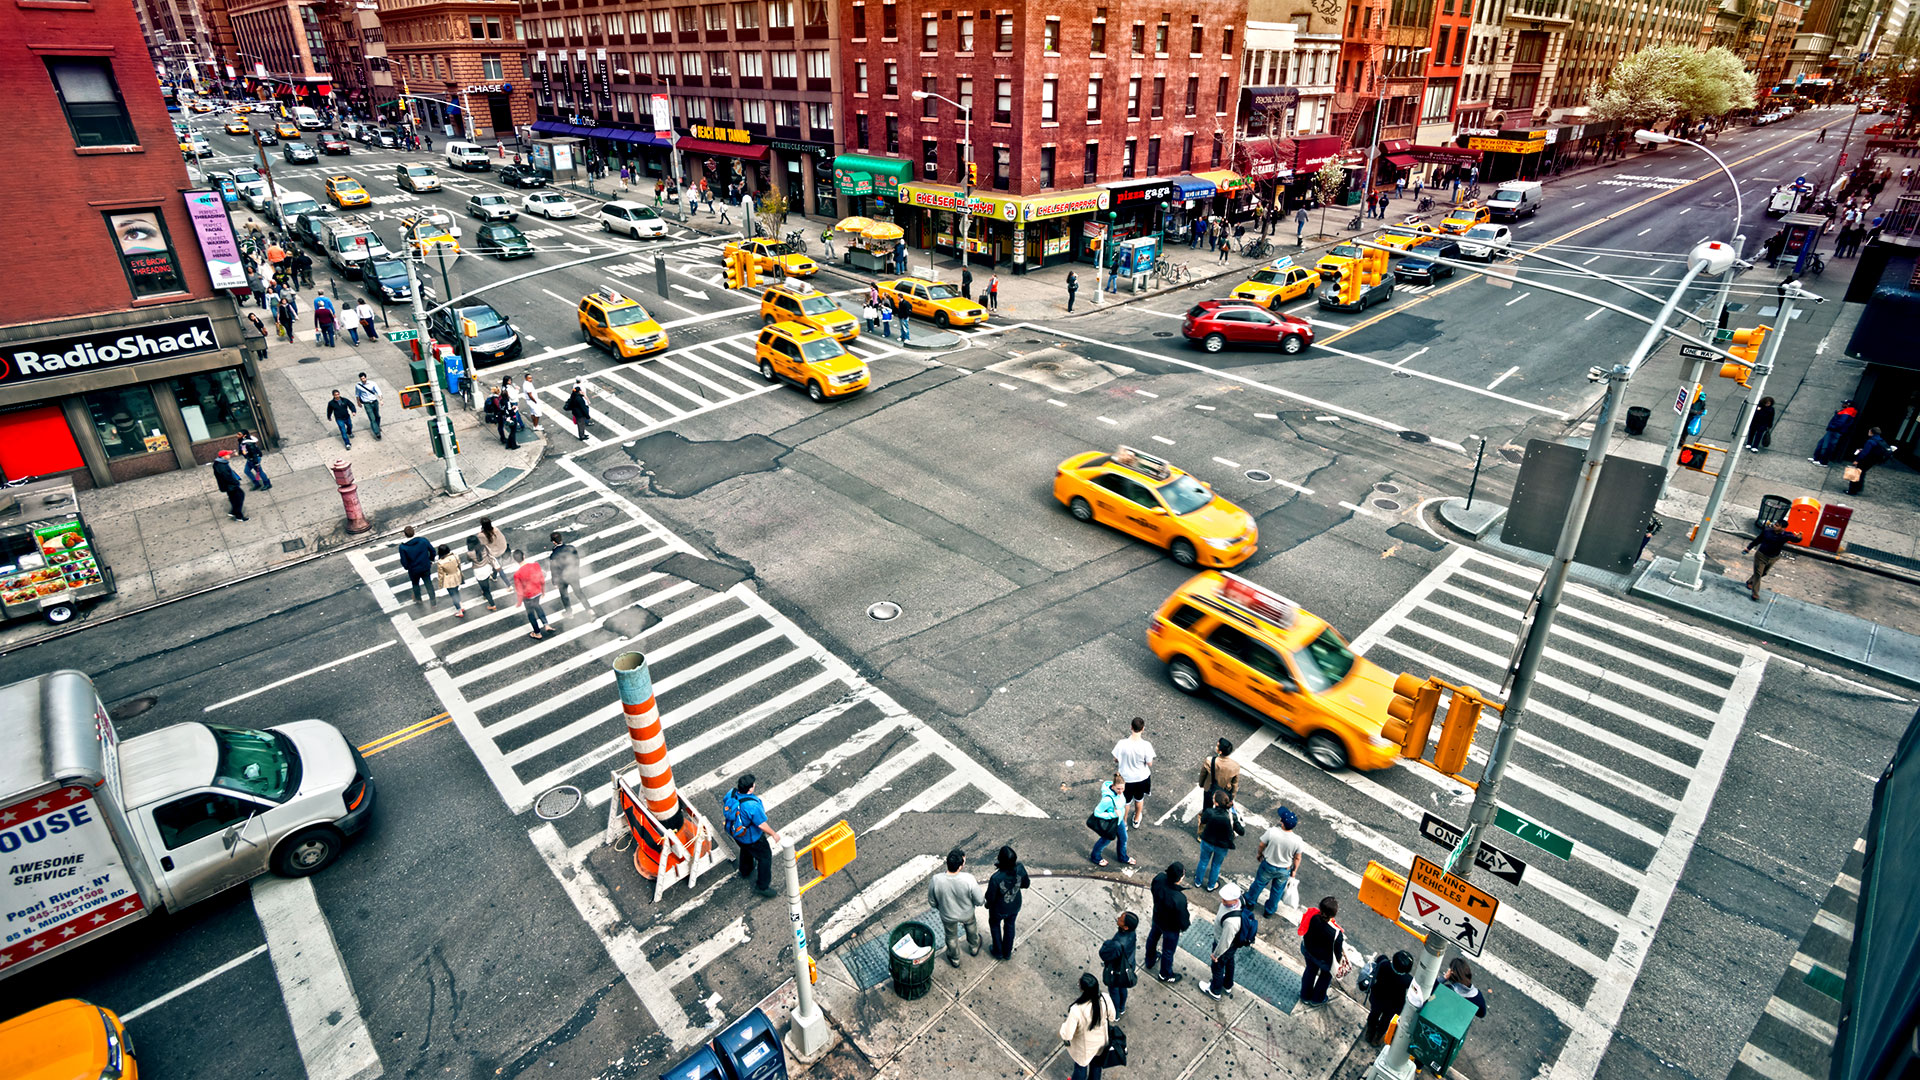

>



# Author name : Nazish Javeed
# Submission date:9-Feb-2024
# Contact me:
# *Linkedin Account :https://www.linkedin.com/mynetwork/
# *Github Accouunt https://github.com/
# * Email Accouunt:Nazishjaveed164@gmail.com
# *Kaggle Accounthttps: //www.kaggle.com/

# Overview about notebook

This notebook utilizes YOLO-NAS for object detection, aiding in easily identifying various objects in images. The tool is designed to be user-friendly, suitable for individuals with varying levels of expertise in computer vision.

# Install the different library


In [1]:
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade
!pip install torchinfo

  Using cached super_gradients-3.1.0-py3-none-any.whl (965 kB)
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Using cached pycocotools-2.0.4.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached onnx_simplifier-0.4.35-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
Using cached onnx_simplifier-0.4.35-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for pycocotools (pyproject.toml) did not run succes

In [3]:
pip install super_gradients


Note: you may need to restart the kernel to use updated packages.


# Import the library

In [5]:
from super_gradients.training import models
from torchinfo import summary

[2024-02-09 19:32:38] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-02-09 19:32:38] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-02-09 19:32:38] INFO - utils.py - NumExpr defaulting to 4 threads.
2024-02-09 19:32:44.360205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 19:32:44.360310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 19:32:44.499671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[2024-02-09 19:32:55] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-02-09 19:32:55] WARNING - export.py - Failed to import pytorch_quantization
[2024-02-09 19:32:55] WARNING - selectiv

# Instantiate Pre-Trained Model

In [6]:
yolo_nas_1= models.get('yolo_nas_s', pretrained_weights='coco')


[2024-02-09 19:33:41] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:02<00:00, 33.2MB/s]
[2024-02-09 19:33:44] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


# Summary of model Architecture

In [7]:
summary(model=yolo_nas_1,
        input_size=(16,3,640,640),
        col_names = ['input_size', 'output_size', 'num_params','trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_S (YoloNAS_S)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

# Import Image 1

In [11]:
img1_path = '/kaggle/input/object-detection'

# Prediction

[2024-02-09 19:34:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


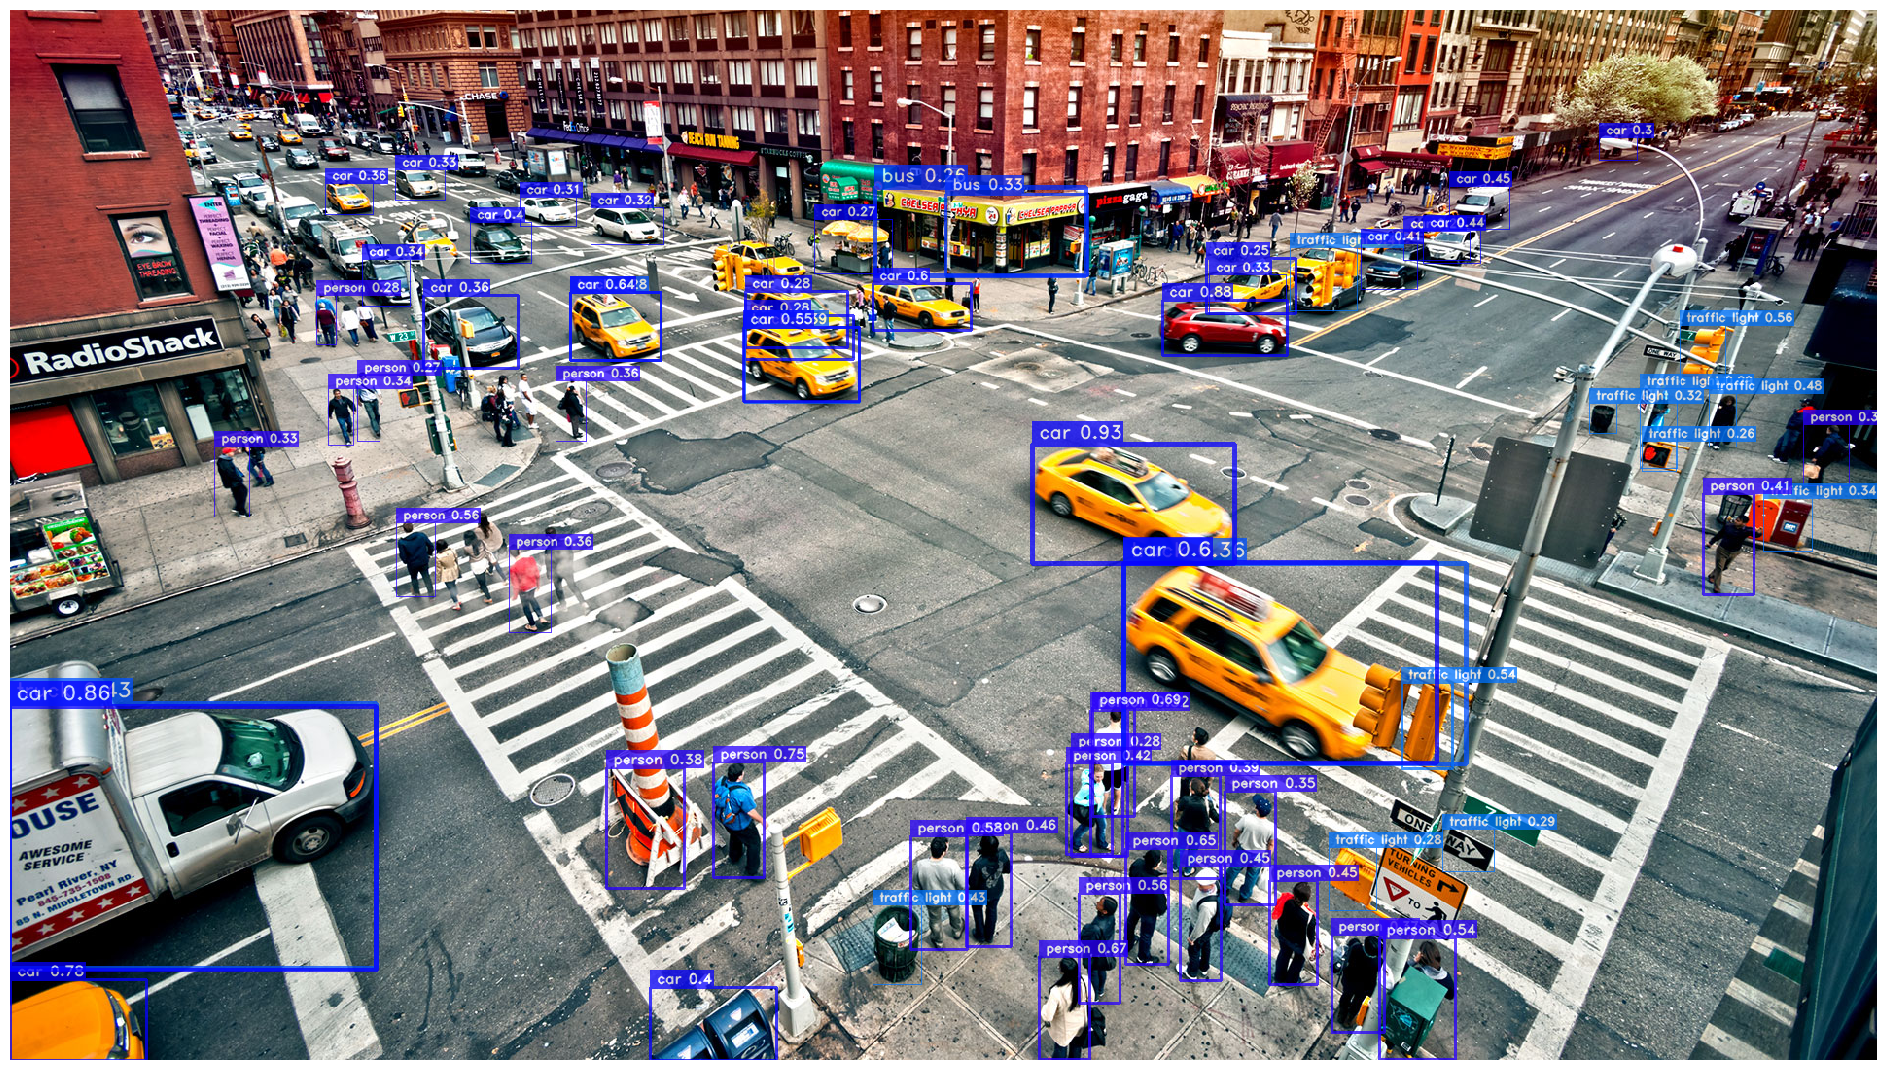

In [12]:
yolo_nas_1.predict(img1_path, conf=0.25).show()


# Import Image 2

In [14]:
img2_path = '/kaggle/input/object-detection2'

# Prediction

[2024-02-09 19:36:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


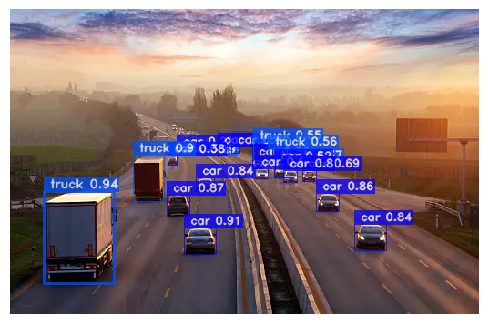

In [15]:
yolo_nas_1.predict(img2_path, conf=0.25).show()